In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import re
import datetime
import dateutil.parser
import statistics
import seaborn as sns

import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import DBSCAN




In [2]:
df = pd.read_csv('football_data.csv')

In [3]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [4]:
# remove columns with more than 1000 missing value
a=df.isna().sum()

for x,y in zip(a.index,a):
    if y>1000:
        df=df.drop([x], axis = 1) 

# remove Photo,Flag and Club Logo Link columns
try:
    df=df.drop(['Photo','Flag','Club Logo'],axis=1)
except:
    print("Already Removed")
    
# remove rows with nan data
df = df.dropna(how='any',axis=0) 


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [6]:
# Height to Float
def h2f(x):
    x=x.split("\'")
    if len(x)==2:
        return float(x[0])+float(x[1])/12
    else:
        return float(x[0])

df['Height']=df['Height'].apply(h2f)


In [7]:
# Weight to Float


def w2f(x):
    x=x.split('lbs')
    return float(x[0])


df['Weight']=df['Weight'].apply(w2f)

# 1. Data visualisation

###      Histogram for Height, Weight and BMI 

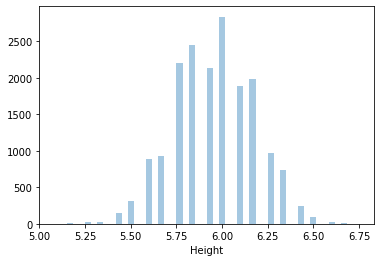

In [8]:
#Heigth
height_data=df['Height']
sns.distplot(height_data.to_numpy(),kde=False,axlabel="Height")


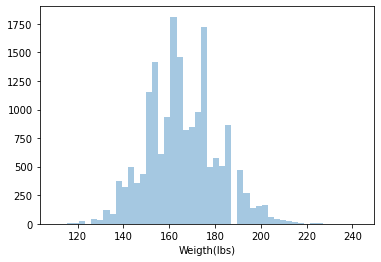

In [9]:

#Weight
weigth_data=df['Weight']
sns.distplot(weigth_data.to_numpy(),kde=False,axlabel="Weigth(lbs)")


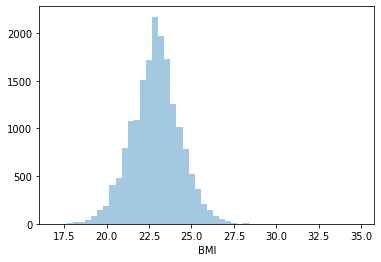

In [10]:
#BMI
bmi=703*(weigth_data.to_numpy())/((12*height_data.to_numpy())**2)
sns.distplot(bmi,kde=False,axlabel="BMI")


###  Distribution of players in different country on the basis of some attribute.

In [11]:
nations = df['Nationality'].unique().tolist()
diction_nation = dict([])
for nation in nations:
    diction_nation[nation] = (df['Nationality'] == nation).sum()
list_nation = list(diction_nation.items())

important_nations = sorted(list_nation,key = lambda x:x[1], reverse = True)[:10]

important_nations = [ x for x,y in important_nations]
impn_data = df[df['Nationality'].isin(important_nations)]

<ipython-input-12-d46b7f5107bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impn_data['Unnamed: 0'] = impn_data.index


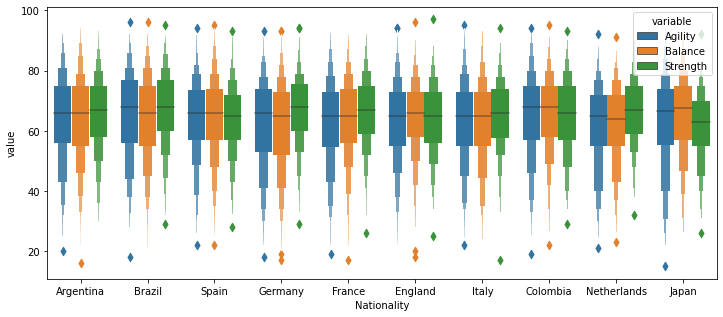

In [12]:
impn_data['Unnamed: 0'] = impn_data.index
impn_plot = impn_data.melt(id_vars='Nationality', value_vars=['Agility', 'Balance','Strength'])

plt.figure(figsize=(12,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Nationality')
plt.show()


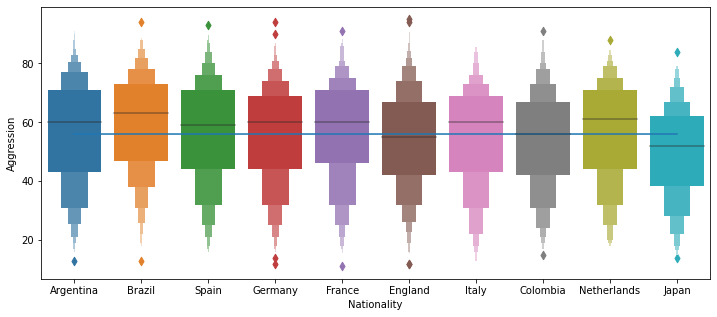

In [13]:

plt.figure(figsize=(12,5))
sns.lineplot(data=impn_data,y = df['Aggression'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_data,y = 'Aggression', x='Nationality')
plt.show()


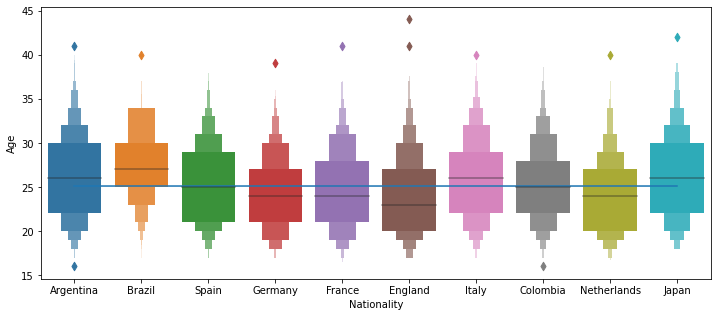

In [14]:
plt.figure(figsize=(12,5))
sns.lineplot(data=impn_data,y = df['Age'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_data,y = 'Age', x='Nationality')
plt.show()


###  Features of players according to their position.

In [15]:
pp=df['Position'].to_numpy()
np.unique(pp)

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [16]:
positions = df['Position'].unique().tolist()
diction_position = dict([])
for position in positions:
    diction_position[position] = (pp == position).sum()
list_position = list(diction_position.items())

important_position = sorted(list_position,key = lambda x:x[1], reverse = True)[:10]
print(important_position)
important_position = [ x for x,y in important_position]

[('ST', 2130), ('GK', 1992), ('CB', 1754), ('CM', 1377), ('LB', 1305), ('RB', 1268), ('RM', 1114), ('LM', 1086), ('CAM', 948), ('CDM', 936)]


<ipython-input-17-3ea9def1bfcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impn_data['Unnamed: 0'] = impn_data.index


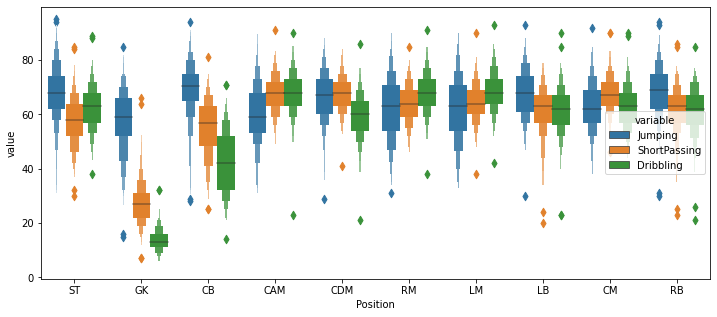

In [17]:
impn_data = df[df['Position'].isin(important_position)]
impn_data['Unnamed: 0'] = impn_data.index
impn_plot = impn_data.melt(id_vars='Position', value_vars=['Jumping', 'ShortPassing','Dribbling'])

plt.figure(figsize=(12,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Position')
plt.show()


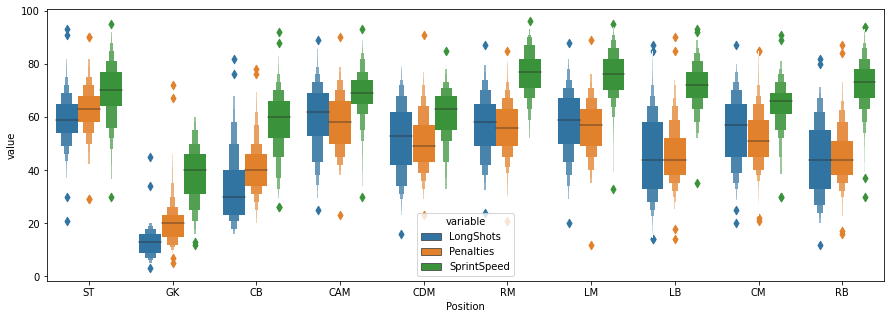

In [18]:

impn_plot = impn_data.melt(id_vars='Position', value_vars=['LongShots', 'Penalties','SprintSpeed'])

plt.figure(figsize=(15,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Position')
plt.show()


### Outliers

# 2. K-means

In [19]:
def dist(x1,x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    assert x1.shape == x2.shape
    
    return np.linalg.norm(x1-x2,2)

In [20]:
class k_means_clustering:
    def __init__(self,k = 2, max_iterations = 100, tolerance = 0.1):
        self.k = k
        self.max_iterations = max_iterations
        self.tolerance = tolerance
    def fit(self, X):
        
        X = X.copy()
        np.random.shuffle(X)
        self.centers = X[:self.k]
        
        for iter_n in range(self.max_iterations):
            self.new_close = list(range(self.k))
            
            for i in range(self.k):
                self.new_close[i] = []
                
            for x in X:
                closest = np.argmin(np.array([ dist(x,self.centers[i]) for i in range(self.k)]))
                self.new_close[closest].append(x)
                
            self.new_centers = self.centers.copy()
            
            for i in range(self.k):
                self.new_centers[i] = np.mean(np.array(self.new_close[i]),axis = 0)

            cf = 0
            for i in range(self.k):
                if dist(self.new_centers[i],self.centers[i]) > self.tolerance:
                    cf = 1
                
            self.centers = self.new_centers.copy()        
            if not cf:
                break
                
    def predict(self, X):
        n = X.shape[0]
        labels = np.zeros(X.shape[0])
        for i in range(n):
            labels[i] = np.argmin(np.array([ dist(X[i],self.centers[j]) for j in range(self.k)]))
        return labels

In [21]:
temp = np.vstack([np.random.randn(20,2),np.random.randn(10,2)+5])
np.random.shuffle(temp)
temp

array([[-4.01363590e-02,  1.42700035e-01],
       [ 1.40477664e-01,  4.84208407e-01],
       [ 6.73665310e-01,  1.37261121e+00],
       [ 5.00183587e+00,  6.38179844e+00],
       [ 1.18759912e+00,  1.18289514e-01],
       [ 1.06205067e+00,  9.01352614e-01],
       [ 9.09320378e-01,  1.29980859e+00],
       [ 5.53919612e-01, -5.73041709e-01],
       [ 2.39797000e+00,  2.03515428e-01],
       [ 3.03988211e-01, -1.44185833e+00],
       [ 4.38547147e+00,  5.77805354e+00],
       [ 5.55465646e+00,  4.19097092e+00],
       [-1.05976645e+00,  4.55600089e-01],
       [ 6.35598917e+00,  5.52428734e+00],
       [-9.18976276e-01, -4.52117205e-01],
       [ 1.48846934e-01, -1.34458719e-01],
       [ 2.36531381e+00,  1.12149621e-01],
       [ 1.10928245e+00, -1.35957856e+00],
       [ 5.49475558e+00,  5.13889248e+00],
       [ 6.70438121e+00,  3.97688417e+00],
       [ 7.06226554e-01,  1.34676477e+00],
       [ 7.18217384e+00,  4.24755972e+00],
       [-3.23859267e-01,  4.92318472e-01],
       [ 3.

In [22]:
kmeans = k_means_clustering()

In [23]:
kmeans.fit(temp)

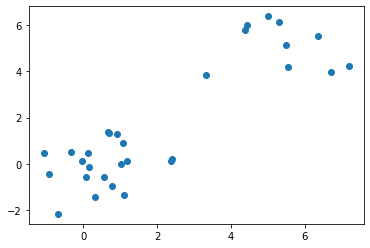

In [24]:
plt.scatter(temp[:,0],temp[:,1])

In [25]:
labels = kmeans.predict(temp)

In [26]:
labels

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.])

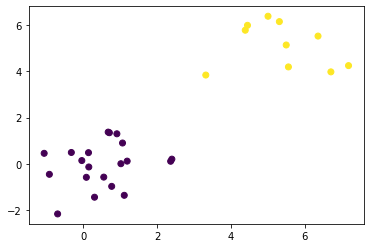

In [27]:
plt.scatter(temp[:,0],temp[:,1], c = labels)

# 3. Hierarchical Clustering

### Agglomerative(bottom-up)

In [28]:
def moneytoint(x):
    x=x[1:]
    if x[-1]=='M':
        x=x[:-1]
        x=float(x)
        x*=10**6
    elif x[-1]=='K':
        x=x[:-1]
        x=float(x)
        x*=10**3
    return int(x)

def foottoint(x):
    if x=='Left':
        return -1
    elif x=='Right':
        return 1

ahc_df= df.copy()
#remove Columns with non numerical data
ahc_df=ahc_df.drop(['Unnamed: 0','ID','Name','Nationality','Club','Work Rate','Body Type','Real Face','Position','Jersey Number','Contract Valid Until'],axis=1)
# Money to numbers
ahc_df['Value']=ahc_df['Value'].apply(moneytoint)
ahc_df['Wage']=ahc_df['Wage'].apply(moneytoint)
# foot to num
ahc_df['Preferred Foot']=ahc_df['Preferred Foot'].apply(foottoint)

ahc_df


,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,110500000,565000,2202,-1,5.0,4.0,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,77000000,405000,2228,1,5.0,4.0,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,118500000,290000,2143,1,5.0,5.0,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,72000000,260000,1471,1,4.0,3.0,1.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,102000000,355000,2281,1,4.0,5.0,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,60000,1000,1307,1,1.0,2.0,2.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,63,60000,1000,1098,1,1.0,2.0,2.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,67,60000,1000,1189,1,1.0,3.0,2.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,66,60000,1000,1228,1,1.0,3.0,2.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [29]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(ahc_df) 
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
X_normalized




,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.035495,0.112797,0.103877,0.540129,0.705776,0.062278,-0.051180,0.276622,0.044898,0.060939,...,0.047464,0.092054,-0.020205,-0.025599,-0.025998,-0.016881,-0.008953,-0.002061,-0.003911,-0.013645
1,0.061343,0.145555,0.134044,0.480895,0.648239,0.083824,0.019982,0.356956,0.057936,0.126670,...,0.084399,0.115606,-0.035212,-0.027998,-0.038672,-0.019726,-0.011553,-0.002660,-0.005046,-0.011525
2,0.006618,0.128574,0.121970,0.712591,0.437466,0.069025,0.019021,0.339789,0.107537,0.120578,...,0.071525,0.107019,-0.035258,-0.037834,-0.020555,-0.014862,-0.015096,-0.002532,-0.002768,-0.010970
3,0.017962,0.158398,0.156331,0.547379,0.500656,-0.020639,0.024379,0.323444,0.003541,-0.079871,...,-0.024135,0.036266,-0.071953,-0.054635,-0.068021,0.184226,0.180237,0.190534,0.186867,0.191274
4,0.014813,0.130625,0.122971,0.646110,0.569692,0.091437,0.020105,0.266732,0.113665,0.079120,...,0.070942,0.093915,0.038135,0.017418,0.009205,-0.003291,-0.007293,-0.024871,-0.013682,-0.007515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,-0.212377,-0.451510,-0.167541,-0.068980,-0.065251,-0.173438,0.089457,-0.046842,-0.233386,-0.078033,...,-0.057467,-0.194454,-0.059443,0.002374,0.010374,-0.060687,-0.032452,-0.090912,-0.080019,-0.069750
17914,-0.163250,-0.347067,-0.169480,-0.053023,-0.050157,-0.229032,0.068764,-0.036006,-0.179399,-0.059982,...,-0.044173,-0.182312,-0.158916,-0.188751,-0.156592,-0.046649,-0.054573,-0.054700,-0.083581,-0.032682
17915,-0.266696,-0.380179,-0.096495,-0.058082,-0.054942,-0.205233,0.075324,-0.039441,0.010941,-0.065705,...,0.056339,-0.211696,-0.105174,-0.219411,-0.223037,-0.082114,-0.092235,-0.051603,-0.083496,-0.028156
17916,-0.224847,-0.360068,-0.112500,-0.055010,-0.052036,-0.175847,0.071340,-0.037355,0.010363,-0.062229,...,0.012031,-0.143716,-0.177921,-0.135908,-0.113678,-0.019022,-0.079672,-0.017371,-0.063813,-0.055624


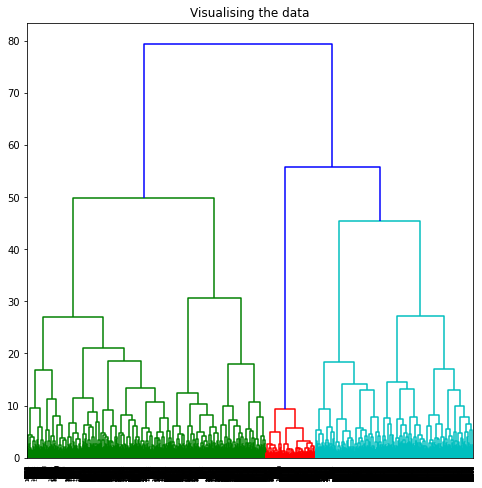

In [30]:

plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_normalized, method ='ward'))) 




In [31]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
c = ac2.fit_predict(X_normalized) 
print(c)

[1 1 1 ... 1 0 0]


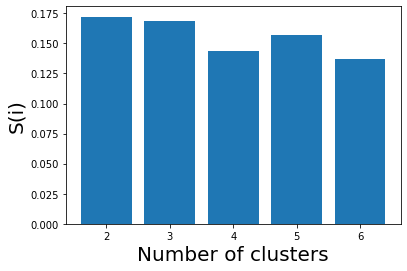

In [32]:
k = [2, 3, 4, 5, 6] 

ac3 = AgglomerativeClustering(n_clusters = 3) 
ac4 = AgglomerativeClustering(n_clusters = 4) 
ac5 = AgglomerativeClustering(n_clusters = 5) 
ac6 = AgglomerativeClustering(n_clusters = 6) 


# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append(silhouette_score(X_normalized, ac2.fit_predict(X_normalized))) 
silhouette_scores.append(silhouette_score(X_normalized, ac3.fit_predict(X_normalized))) 
silhouette_scores.append(silhouette_score(X_normalized, ac4.fit_predict(X_normalized))) 
silhouette_scores.append(silhouette_score(X_normalized, ac5.fit_predict(X_normalized))) 
silhouette_scores.append(silhouette_score(X_normalized, ac6.fit_predict(X_normalized))) 

# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 


In [33]:
print(silhouette_scores)

[0.1721644874543279, 0.16850341973030503, 0.1432719629410131, 0.15730919489183567, 0.13686445960906163]


# 4. DBSCAN

In [ ]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X_normalized)
print(clustering)